<img src="images/charmeleon.png" alt="Adept" width="200">

# Adept level

This code in the cell does some preliminary things to make things a bit easier down the road. It `import`s all the function we'll be using and configures the 3D graphics. All stuff I don't want you to worry about right now. Just run the cell and be on your way!

In [8]:
import mne
from mne import pick_types, read_trans, Epochs, find_events
from mne.io import read_raw_fif
from mne.viz import plot_raw, plot_epochs
from mne.minimum_norm import read_inverse_operator, apply_inverse
data_path = mne.datasets.sample.data_path()
from mayavi import mlab
mlab.init_notebook('ipy')
%matplotlib inline

Notebook initialized with ipy backend.


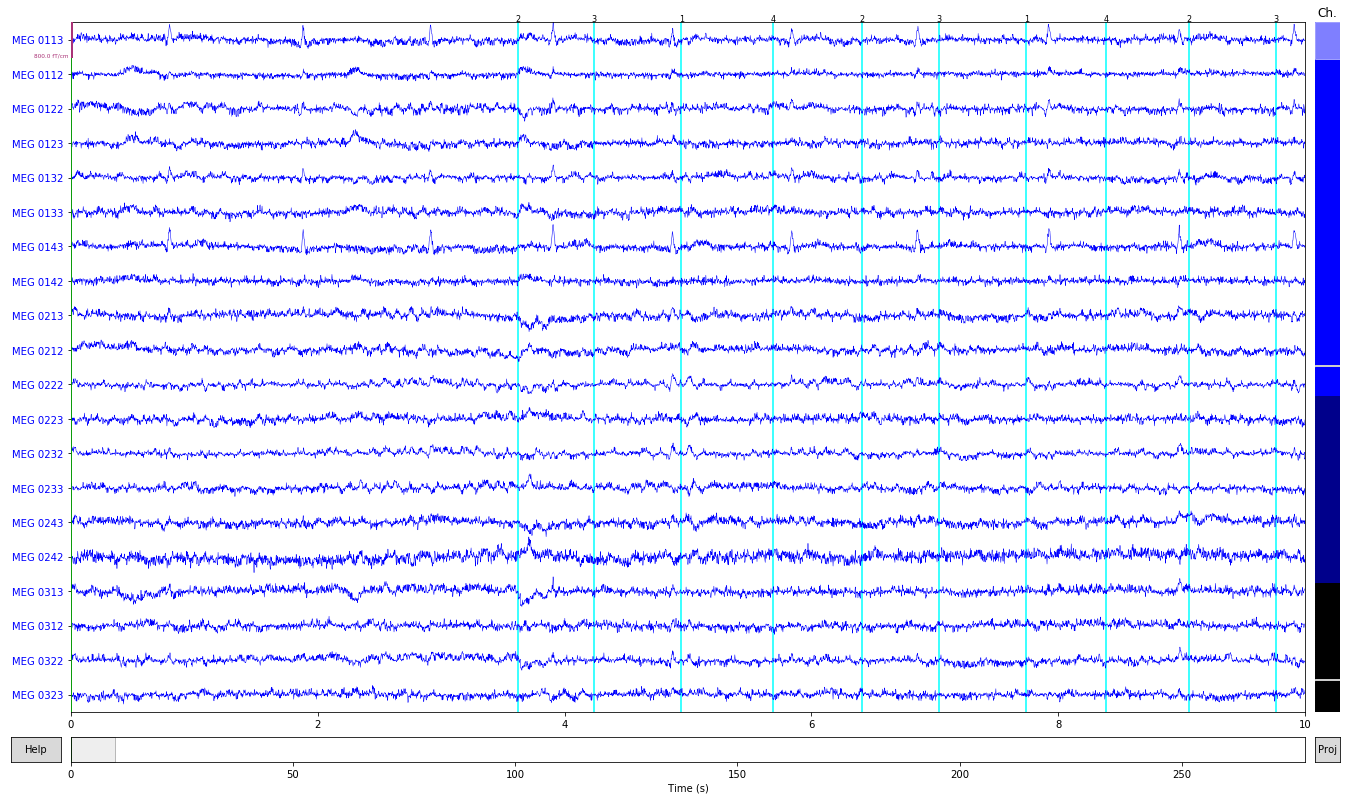

In [9]:
raw = read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')
events = find_events(raw)
plot_raw(raw, events=events);

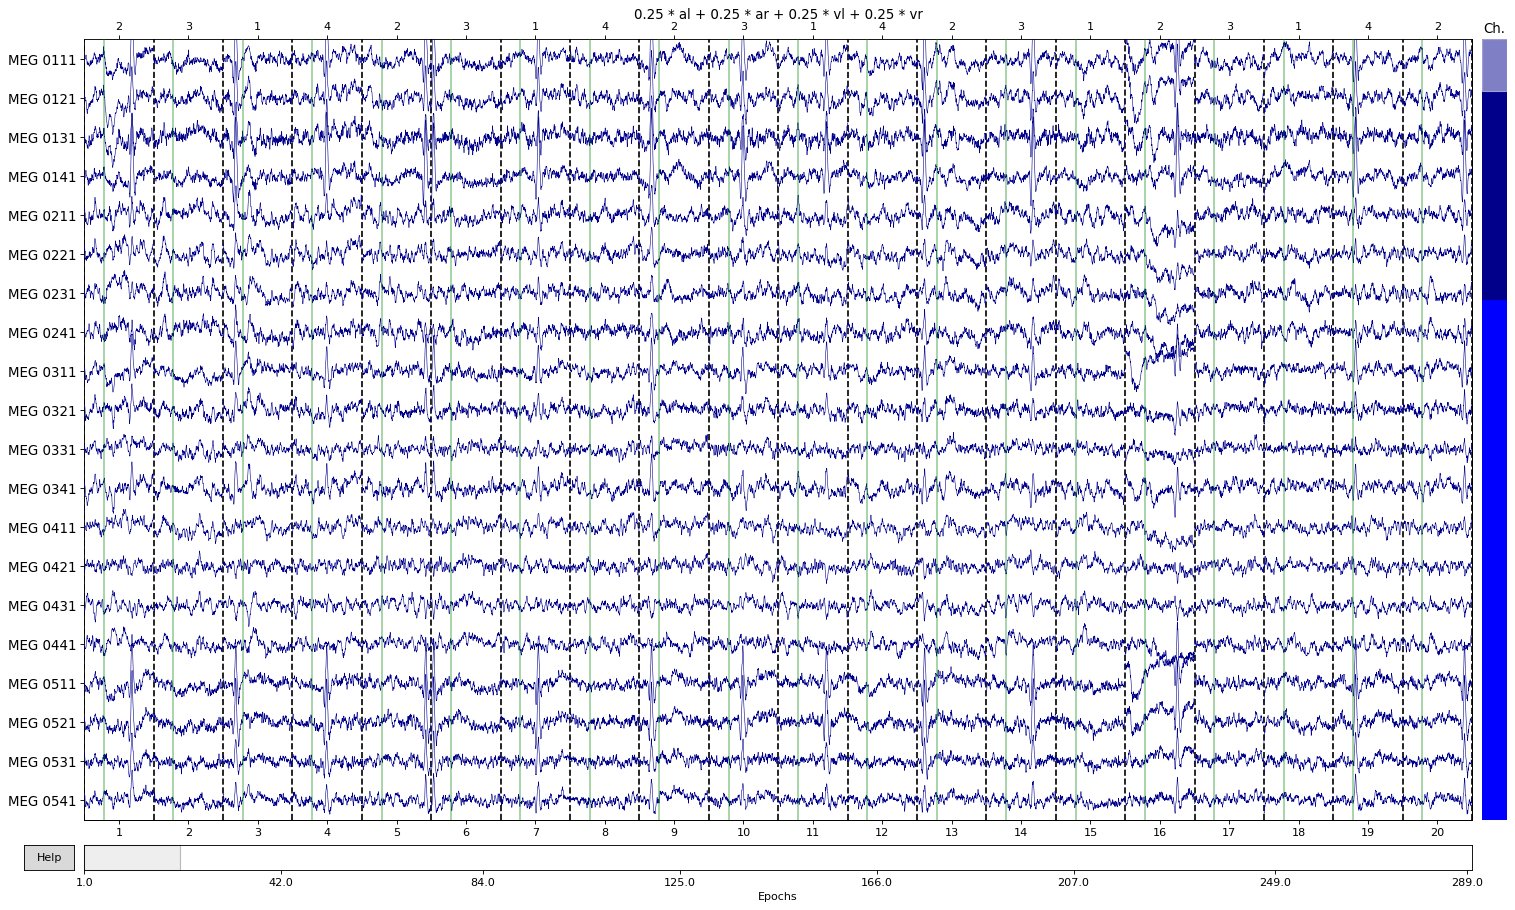

In [10]:
picks = mne.pick_types(raw.info, meg=True, eeg=False)
epochs = mne.Epochs(raw, events, event_id=dict(al=1, ar=2, vl=3, vr=4), tmin=-0.2, tmax=0.5, baseline=(-0.2, 0), picks=picks)
epochs.plot();

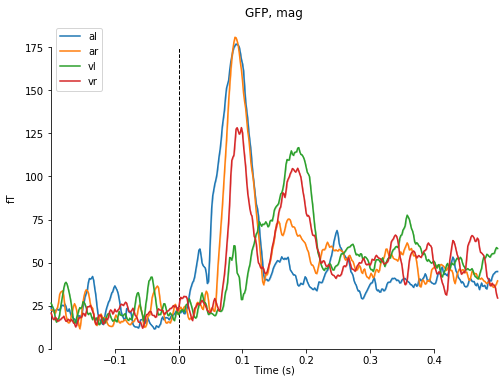

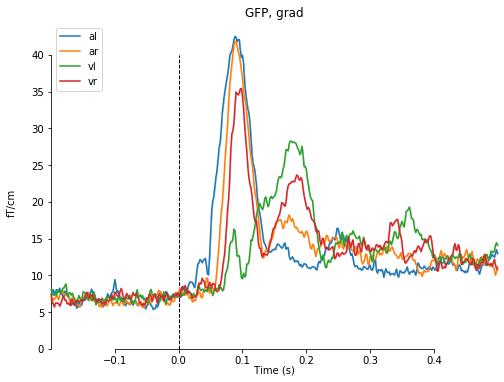

[<Figure size 576x432 with 1 Axes>, <Figure size 576x432 with 1 Axes>]

In [11]:
evoked = {cl:epochs[cl].average() for cl in epochs.event_id.keys()}
mne.viz.plot_compare_evokeds(evoked, show_legend='upper left')

In [19]:
trans = mne.read_trans('/l/vanvlm1/sample-min/sample-trans.fif')
mne.viz.plot_alignment(epochs.info, trans, subject='sample', subjects_dir='/l/vanvlm1/sample-min/mri')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x03 \x08\x02\x00\x00\x00T\x12\x91?\x00\…

In [13]:
src = mne.setup_source_space('sample', subjects_dir=data_path + '/subjects', add_dist=False)
src.plot(subjects_dir='/l/vanvlm1/sample-min/mri')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x03 \x08\x02\x00\x00\x00T\x12\x91?\x00\…

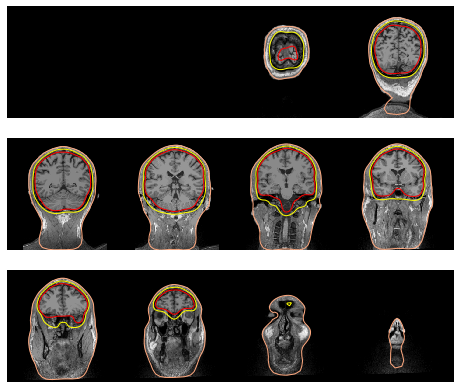

In [14]:
bem = mne.read_bem_solution('/l/vanvlm1/sample-min/mri/sample/bem/bem-sol.fif')
mne.viz.plot_bem('sample', '/l/vanvlm1/sample-min/mri');

In [15]:
fwd = mne.make_forward_solution(epochs.info, trans, src, bem)

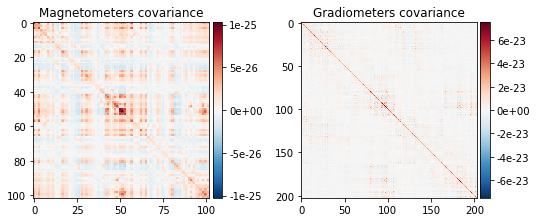

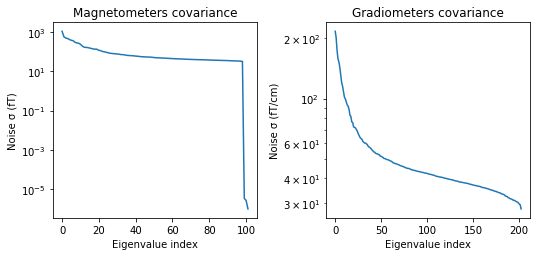

In [16]:
noise_cov = mne.compute_covariance(epochs, tmin=-0.2, tmax=0, method='shrunk')
mne.viz.plot_cov(noise_cov, epochs.info);

In [17]:
inv = mne.minimum_norm.make_inverse_operator(epochs.info, fwd, noise_cov)

In [20]:
# Apply inverse solution
snr = 3.0
lambda2 = 1.0 / snr ** 2
stc = apply_inverse(evoked['vr'], inv, lambda2, 'dSPM')

# Plot the source estimate
stc.plot(initial_time=0.1, hemi='both', size=400,
         subjects_dir='/l/vanvlm1/sample-min/mri',
         views=['caudal'])

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\…